<a href="https://colab.research.google.com/github/Rishabh28mehtA/ML/blob/main/Block2_Challenge_AirBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Libraries

In [ ]:
%%time
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


CPU times: user 1.28 s, sys: 262 ms, total: 1.54 s
Wall time: 1.87 s


Explanation:

•	pandas: For data manipulation and analysis.

•	numpy: For numerical operations.

•	seaborn and matplotlib: For data visualization.

•	scikit-learn: For machine learning tasks such as model building and evaluation.


### Loading the data

In [ ]:
%%time
filepath = "/content/drive/MyDrive/Colab_Notebooks/4070/listings.csv"

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.78 µs


In [ ]:
%%time
listings = pd.DataFrame(pd.read_csv(filepath))

<timed exec>:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 4.82 s, sys: 859 ms, total: 5.68 s
Wall time: 9.47 s


###Data Preparation and cleaning

In [ ]:
%%time
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            87946 non-null  int64  
 1   listing_url                                   87946 non-null  object 
 2   scrape_id                                     87946 non-null  int64  
 3   last_scraped                                  87946 non-null  object 
 4   source                                        87946 non-null  object 
 5   name                                          87946 non-null  object 
 6   description                                   86679 non-null  object 
 7   neighborhood_overview                         47190 non-null  object 
 8   picture_url                                   87943 non-null  object 
 9   host_id                                       87946 non-null 

##### We need to make the dimensions uniform for each column, remove unnecessary or insignificant features of the model also, try and convert some features that are objects into floats or numbers , so we can use them in the model later on.

In [ ]:
listings['id'].nunique()

87946

In [ ]:
listings['host_name'].nunique()

14976

In [ ]:
listings['name'].nunique()

21356

In [ ]:
listings['neighbourhood_cleansed'].nunique()

33

In [ ]:
listings['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Westminster               9992
Tower Hamlets             7080
Hackney                   6182
Kensington and Chelsea    5818
Camden                    5757
Southwark                 5015
Lambeth                   4774
Islington                 4675
Wandsworth                4419
Hammersmith and Fulham    3795
Brent                     2740
Lewisham                  2581
Haringey                  2382
Newham                    2311
Barnet                    2249
Ealing                    2169
Greenwich                 1927
Waltham Forest            1715
Croydon                   1506
Merton                    1453
Richmond upon Thames      1257
Hounslow                  1253
Redbridge                  869
Hillingdon                 863
Enfield                    820
Bromley                    772
Kingston upon Thames       699
Barking and Dagenham       564
City of London             536
Harrow                     503
Bexley                     495
Havering        

In [ ]:
listings['room_type'].iloc[:]

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4           Private room
              ...       
87941    Entire home/apt
87942    Entire home/apt
87943       Private room
87944    Entire home/apt
87945    Entire home/apt
Name: room_type, Length: 87946, dtype: object

In [ ]:
listings['host_has_profile_pic'].nunique()

2

In [ ]:
listings['host_has_profile_pic'].value_counts()

host_has_profile_pic
t    85165
f     2776
Name: count, dtype: int64

In [ ]:
listings['host_is_superhost'].nunique()

2

In [ ]:
listings['host_is_superhost'].value_counts()

host_is_superhost
f    73716
t    13298
Name: count, dtype: int64

######Why superhost is a good indicator?
To qualify as a Superhost, the following criteria must be met:

Superhosts must maintain a response rate of at least 90%.

Superhosts should cancel less than 1% of the time. For hosts with fewer than 100 reservations per year, this means no cancellations.

Superhosts must have an average overall rating of 4.8 or higher, based on reviews from guests over the past year.

Superhost status is verified every three months to ensure ongoing compliance with these criteria over the past year.

In [ ]:
listings['host_identity_verified'].nunique()

2

In [ ]:
listings['host_identity_verified'].value_counts()

host_identity_verified
t    76792
f    11149
Name: count, dtype: int64

######Every Host, Co-Host, and booking guest must be identity verified to use airbnb platform.

######This aims to minimize fraudulent behavior, promote safety, and enable meaningful, real world interactions within our community.

In [ ]:
listings['reviews_per_month'].nunique()

944

In [ ]:
listings['reviews_per_month'].value_counts()

reviews_per_month
0.02    2287
0.01    1915
1.00    1766
0.03    1468
0.04    1435
        ... 
9.18       1
8.21       1
8.55       1
8.35       1
8.25       1
Name: count, Length: 944, dtype: int64

In [ ]:
listings['host_response_time'].nunique()

4

In [ ]:
listings['host_response_time'].value_counts()

host_response_time
within an hour        39089
within a few hours    11369
within a day           6591
a few days or more     1979
Name: count, dtype: int64

In [ ]:
num_col = listings.select_dtypes(exclude = "object").columns
print(list(num_col))

['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']


In [ ]:
cat_col = listings.select_dtypes(include = "object").columns
print(list(cat_col))


['listing_url', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'instant_bookable']


In [ ]:
null_count = listings.isnull().sum()
more_than_zero = null_count[null_count>0]
print(more_than_zero)
print(listings.shape)

# This code analyzes null values in the listings dataframe,
#It calculates the count of null values for each column, identifies columns with more than zero null values,
#It prints out those counts, and then prints out the shape of the dataframe.

description                      1267
neighborhood_overview           40756
picture_url                         3
host_name                           5
host_since                          5
host_location                   18778
host_about                      42040
host_response_time              28918
host_response_rate              28918
host_acceptance_rate            25188
host_is_superhost                 932
host_thumbnail_url                  5
host_picture_url                    5
host_neighbourhood              39867
host_listings_count                 5
host_total_listings_count           5
host_verifications                  5
host_has_profile_pic                5
host_identity_verified              5
neighbourhood                   40755
neighbourhood_group_cleansed    87946
bathrooms                       87946
bathrooms_text                    103
bedrooms                        32774
beds                             1134
minimum_minimum_nights              1
maximum_mini

In [ ]:
#dropping insignificant columns
listings.drop(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated','host_verifications',
             'description','neighborhood_overview','neighbourhood','bedrooms','beds','bathrooms_text', 'host_location',
             'host_thumbnail_url','host_picture_url','host_neighbourhood','first_review','last_review',
             'picture_url', 'host_name', 'host_since', 'host_about'], axis=1, inplace=True)

#Dropping columns like 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated','host_verifications'
#because they have no values in their respective columns,
#Dropping rest of the columns, because features contain significant number of null values and their dtypes are objects, and are not categorical.
#However dropping columns can lead to loss of valuable information.

In [ ]:
null_count = listings.isnull().sum()
more_than_zero = null_count[null_count>0]
print(more_than_zero)
print(listings.shape)

host_response_time             28918
host_response_rate             28918
host_acceptance_rate           25188
host_is_superhost                932
host_listings_count                5
host_total_listings_count          5
host_has_profile_pic               5
host_identity_verified             5
minimum_minimum_nights             1
maximum_minimum_nights             1
minimum_maximum_nights             1
maximum_maximum_nights             1
minimum_nights_avg_ntm             1
maximum_nights_avg_ntm             1
review_scores_rating           22158
review_scores_accuracy         23093
review_scores_cleanliness      23081
review_scores_checkin          23125
review_scores_communication    23095
review_scores_location         23125
review_scores_value            23126
license                        87945
reviews_per_month              22158
dtype: int64
(87946, 55)


In [ ]:
# Replace null values with 0 in columns with float dtypes

col_fill = ['reviews_per_month', 'review_scores_value','review_scores_location','review_scores_communication',
            'review_scores_checkin','review_scores_cleanliness','review_scores_accuracy','review_scores_rating',
            'maximum_nights_avg_ntm','minimum_nights_avg_ntm','maximum_maximum_nights','minimum_maximum_nights','maximum_minimum_nights',
            'minimum_minimum_nights','host_total_listings_count', 'host_listings_count']
listings[col_fill] = listings[col_fill].fillna(0)

#Replacing null values to make the shape of the columns uniform.
#However it could introduce bias or inaccuracies into the data.

In [ ]:
null_count = listings.isnull().sum()
more_than_zero = null_count[null_count>0]
print(more_than_zero)
print(listings.shape)

host_response_time        28918
host_response_rate        28918
host_acceptance_rate      25188
host_is_superhost           932
host_has_profile_pic          5
host_identity_verified        5
license                   87945
dtype: int64
(87946, 55)


In [ ]:
# Function to convert percentages and handle N/A
def convert_percentage(value):
    if pd.isna(value) or value == 'N/A':
        return 0.0
    else:
        return float(value.strip('%')) / 100.0

In [ ]:
# Apply the function to the 'host_response_rate' column
listings['host_response_rate'] = listings['host_response_rate'].apply(convert_percentage)

# Print the data type of the 'host_response_rate' column after conversion
print(listings['host_response_rate'].dtype)
listings['host_response_rate'].isnull().sum()

float64


0

In [ ]:
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].apply(convert_percentage)
print(listings['host_acceptance_rate'].dtype)
listings['host_acceptance_rate'].isnull().sum()

float64


0

In [ ]:
# Function to convert 't', 'f', and NaN to 1 and 0
def convert_status(value):
    if pd.isna(value) or value == 'f':
        return 0
    elif value == 't':
        return 1
    else:
        return 0

listings['host_is_superhost'] = listings['host_is_superhost'].apply(convert_status)
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].apply(convert_status)
listings['host_identity_verified'] = listings['host_identity_verified'].apply(convert_status)

In [ ]:
# Function to convert 't', 'f', and NaN to 1 and 0
def convert_str(value):
    if pd.isna(value) or value == 'a few days or more':
        return 0
    elif value == 'within a few hours' or value == 'within an hour' or value == 'within a day':
        return 1
    else:
        return 0
listings['host_response_time'] = listings['host_response_time'].apply(convert_str)
print(listings['host_response_time'].dtype)
listings['host_response_time'].isnull().sum()

listings['instant_bookable'] = listings['instant_bookable'].apply(convert_str)
print(listings['instant_bookable'].dtype)
listings['instant_bookable'].isnull().sum()

int64
int64


0

In [ ]:
# Function to convert 't', 'f', and NaN to 1 and 0
def convert_str_license(value):
    if pd.isna(value) or value == 0:
        return 0
    elif value == 'VFT/MA/58386':
        return 1
    else:
        return 0
listings['license'] = listings['license'].apply(convert_str)


#####In above functions and codes we are trying to convert objects to floats dtypes, so that we can use the features in train/test model.

In [ ]:
null_count = listings.isnull().sum()
more_than_zero = null_count[null_count>0]
print(more_than_zero)
print(listings.shape)

Series([], dtype: int64)
(87946, 55)


In [ ]:
listings.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
host_id                                         0
host_url                                        0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0


In [ ]:
#Converting Price dtype from object to float

# Replace common placeholders and remove dollar signs
listings['price'] = listings['price'].replace(['', 'NA', 'N/A', '-'], np.nan)
listings['price'] = listings['price'].str.replace('[\$,]', '', regex=True).str.strip()
# This line removes dollar signs ('$') from the 'price' column using regular expressions, and then strips any leading or trailing whitespace.

# Convert to numeric, coercing errors to NaN
listings['price'] = pd.to_numeric(listings['price'], errors='coerce')
# This line converts the 'price' column to numeric data type (float), coercing errors to NaN.
# The 'coerce' parameter ensures that if conversion fails for any value, it will be replaced with NaN.



In [ ]:
# Display the modified DataFrame to verify changes
print(listings['price'].describe())

count    87946.000000
mean       181.349817
std        486.174310
min          0.000000
25%         63.000000
50%        110.000000
75%        193.000000
max      80100.000000
Name: price, dtype: float64


In [ ]:
listings.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
host_id                                         0
host_url                                        0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0


In [ ]:
listings.info()
#To ensure equal number of rows in each column and no null spaces

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            87946 non-null  int64  
 1   listing_url                                   87946 non-null  object 
 2   scrape_id                                     87946 non-null  int64  
 3   last_scraped                                  87946 non-null  object 
 4   source                                        87946 non-null  object 
 5   name                                          87946 non-null  object 
 6   host_id                                       87946 non-null  int64  
 7   host_url                                      87946 non-null  object 
 8   host_response_time                            87946 non-null  int64  
 9   host_response_rate                            87946 non-null 

###Data Exploration and Visualization

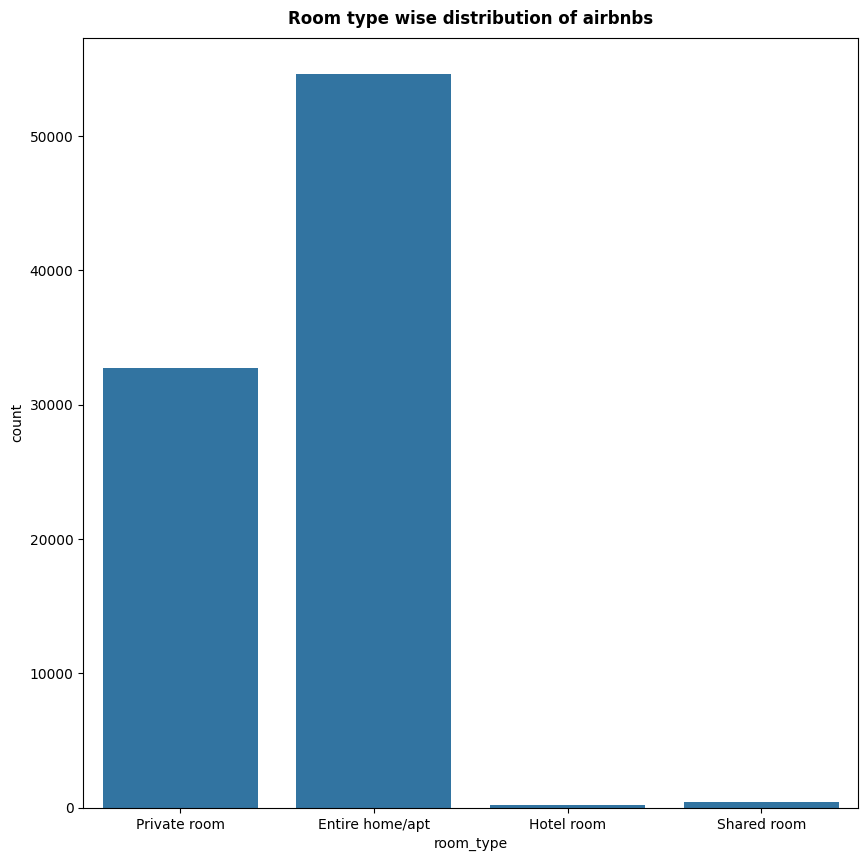

In [ ]:
#Room Types
plt.figure(figsize=(10,10))
sns.countplot(x='room_type', data=listings)
plt.title('Room type wise distribution of airbnbs', fontweight='bold', pad=10)
plt.show()

#This show us that Entire home/apartment and private room have the highest listings while hotel and shared rooms are comparitively insignificant.

In [ ]:
#Top Host IDs vs no. of listings under each hosts
top_host=listings.host_id.value_counts().head(25)
print(top_host)

sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'host_id':'Host_ID', 'count':'P_Count'}, inplace=True)
print(top_host_df)

host_id
129230780    595
33889201     312
314162972    301
28820321     288
1432477      259
258154594    233
269308503    202
48165024     200
156158778    195
439074505    170
224866971    139
315820320    125
83740964     123
228928499    123
2125620      112
457409512    111
89355192     108
124359784    108
74167394     106
9063235      103
215357262     98
105564995     93
5281536       89
57989340      88
10961046      85
Name: count, dtype: int64
      Host_ID  P_Count
0   129230780      595
1    33889201      312
2   314162972      301
3    28820321      288
4     1432477      259
5   258154594      233
6   269308503      202
7    48165024      200
8   156158778      195
9   439074505      170
10  224866971      139
11  315820320      125
12   83740964      123
13  228928499      123
14    2125620      112
15  457409512      111
16   89355192      108
17  124359784      108
18   74167394      106
19    9063235      103
20  215357262       98
21  105564995       93
22    528153

<ipython-input-42-34ec430e584a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
<ipython-input-42-34ec430e584a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)


[Text(0, 0, '1432477'),
 Text(1, 0, '2125620'),
 Text(2, 0, '5281536'),
 Text(3, 0, '9063235'),
 Text(4, 0, '10961046'),
 Text(5, 0, '28820321'),
 Text(6, 0, '33889201'),
 Text(7, 0, '48165024'),
 Text(8, 0, '57989340'),
 Text(9, 0, '74167394'),
 Text(10, 0, '83740964'),
 Text(11, 0, '89355192'),
 Text(12, 0, '105564995'),
 Text(13, 0, '124359784'),
 Text(14, 0, '129230780'),
 Text(15, 0, '156158778'),
 Text(16, 0, '215357262'),
 Text(17, 0, '224866971'),
 Text(18, 0, '228928499'),
 Text(19, 0, '258154594'),
 Text(20, 0, '269308503'),
 Text(21, 0, '314162972'),
 Text(22, 0, '315820320'),
 Text(23, 0, '439074505'),
 Text(24, 0, '457409512')]

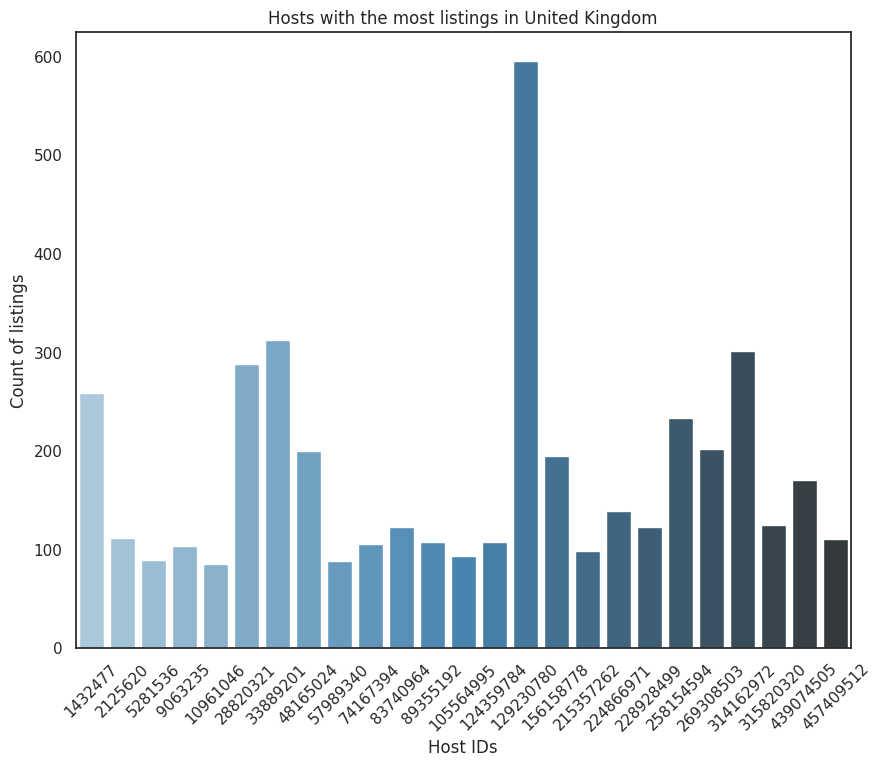

In [ ]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in United Kingdom')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)


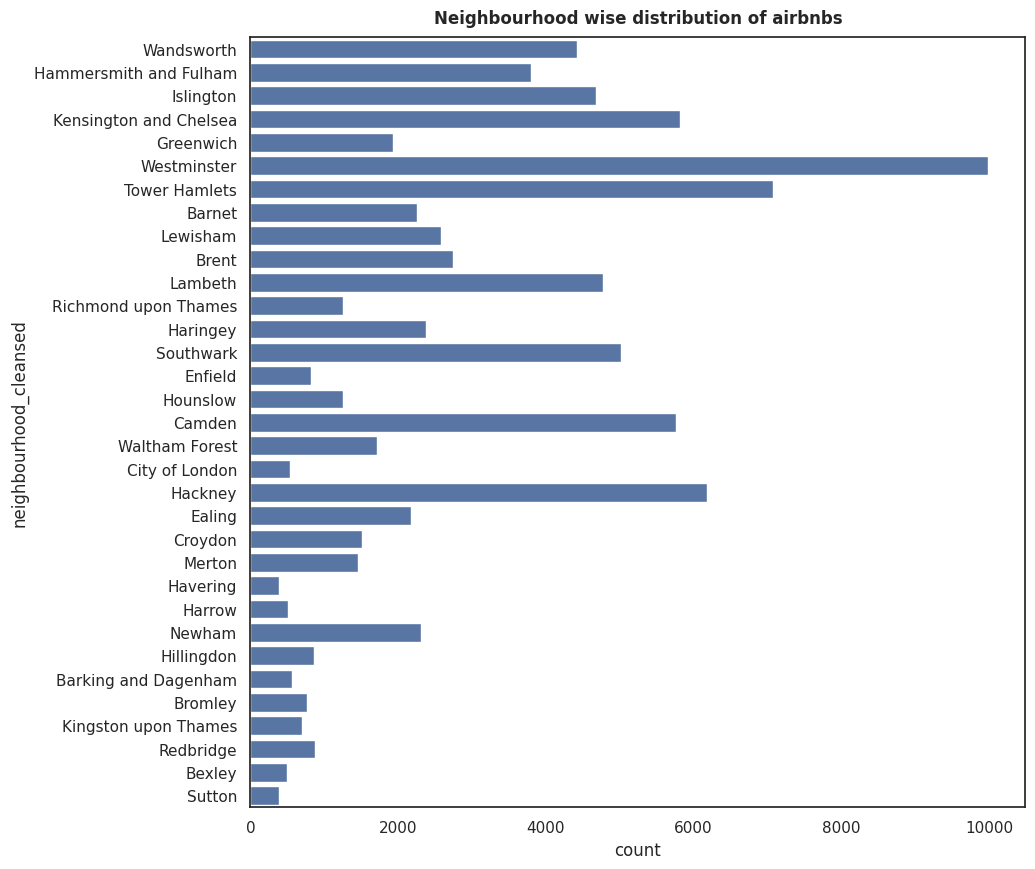

In [ ]:
#neighbourhood wise distribution of listings
plt.figure(figsize=(10,10))
sns.countplot(y='neighbourhood_cleansed', data=listings)
plt.title('Neighbourhood wise distribution of airbnbs', fontweight='bold', pad=10)
plt.show()
#Westminster topping the list of neighbourhood with highest number of listings

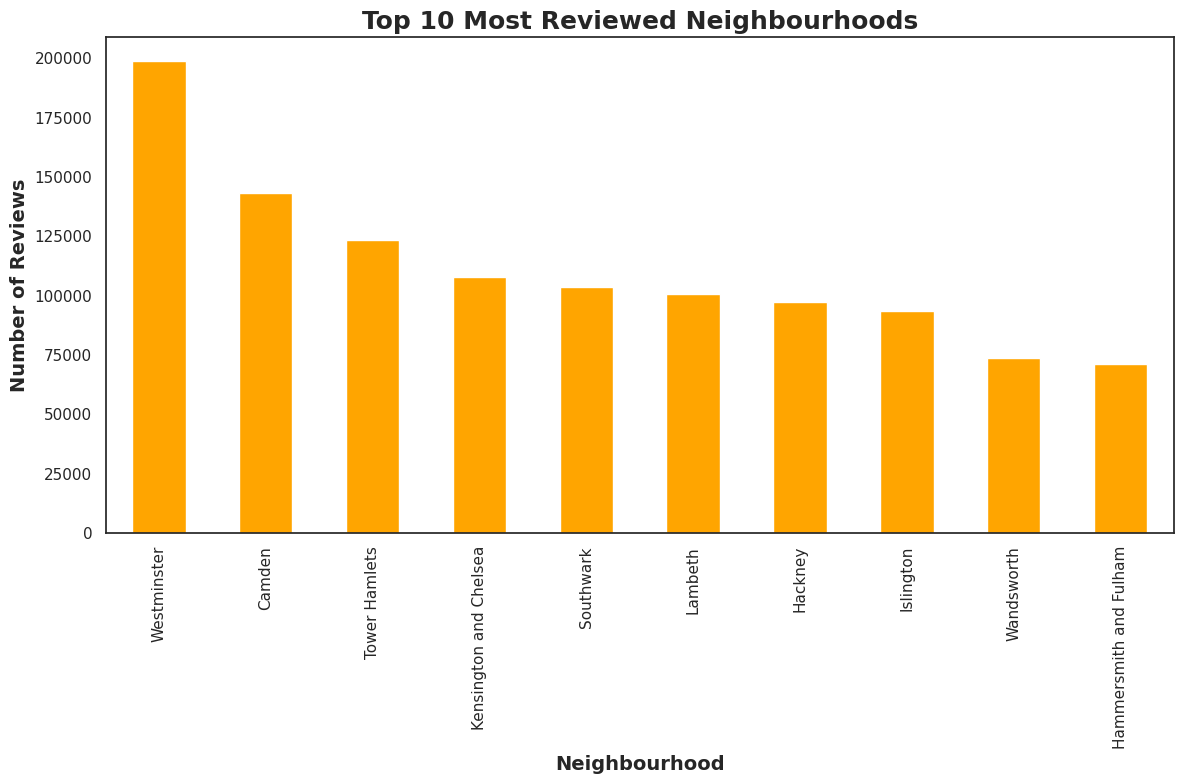

In [ ]:
# Calculate the total number of reviews for each neighbourhood
neighbourhood_reviews = listings.groupby('neighbourhood_cleansed')['number_of_reviews'].sum()

# Select the top 10 most reviewed neighbourhoods
top_10_neighbourhoods = neighbourhood_reviews.nlargest(10)

# Plotting
plt.figure(figsize=(12, 8))

# Bar plot for the top 10 most reviewed neighbourhoods
top_10_neighbourhoods.plot(kind='bar', color='orange')

# Title and labels
plt.title('Top 10 Most Reviewed Neighbourhoods', fontweight='bold', fontsize=18)
plt.xlabel('Neighbourhood', fontweight='bold', fontsize=14)
plt.ylabel('Number of Reviews', fontweight='bold', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


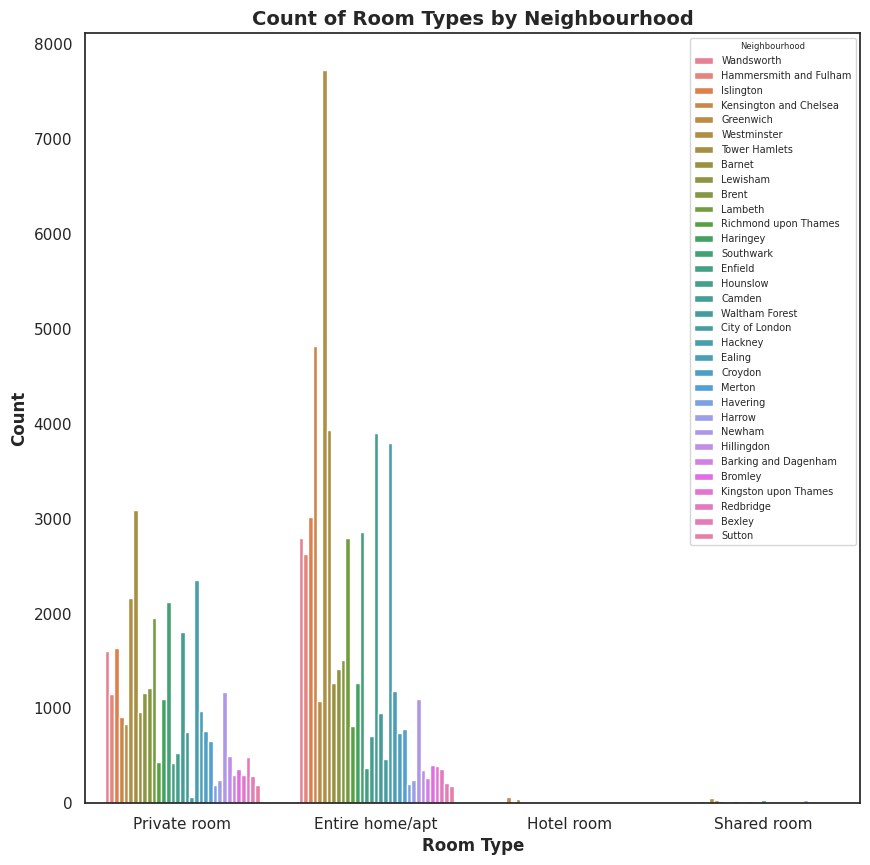

In [ ]:
# Category count plot between room type and neighbourhood group
plt.figure(figsize=(10, 10))
sns.countplot(x='room_type', hue='neighbourhood_cleansed', data=listings)

# Title and labels
plt.title('Count of Room Types by Neighbourhood', fontweight='bold', fontsize=14)
plt.xlabel('Room Type', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)

# Adjust legend
plt.legend(title='Neighbourhood', title_fontsize='6', fontsize='7', loc='upper right')

# Show plot
plt.show()


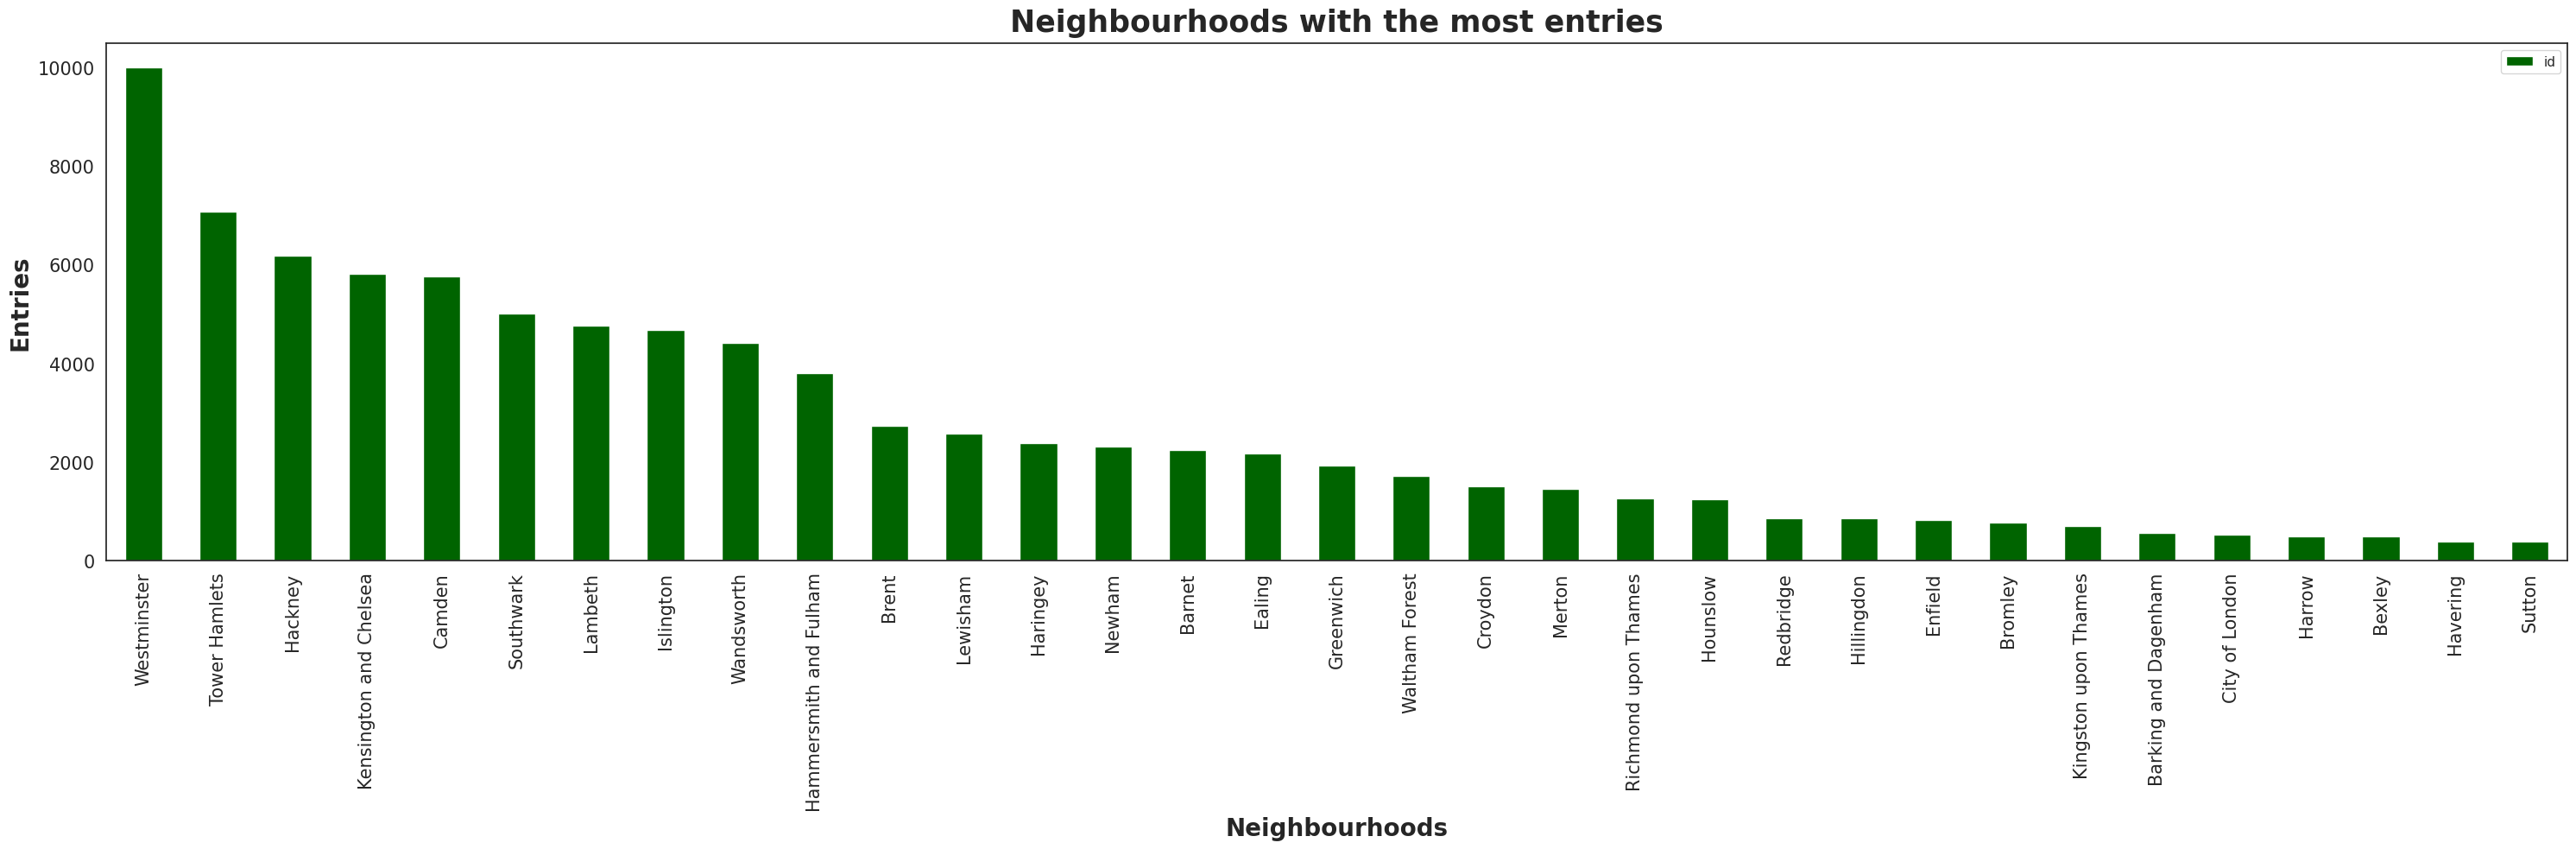

In [ ]:
neighbourhood_df = listings.groupby(by=['neighbourhood_cleansed'], as_index=False).agg({'id':'nunique'}).sort_values('id', ascending=False, ignore_index=True)
neighbourhood_df.head(60).plot.bar(x='neighbourhood_cleansed',color='darkgreen',fontsize=15,figsize=(30,10))
plt.title('Neighbourhoods with the most entries',fontweight='bold',fontsize=25,pad=10)
plt.ylabel('Entries',fontweight='bold',fontsize=20)
plt.xlabel('Neighbourhoods',fontweight='bold',fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
#What are the neighbourhoods where the owners are prefering longer stays rather than one shorter inn type stays?

listings.groupby('neighbourhood_cleansed')['minimum_nights'].mean()

neighbourhood_cleansed
Barking and Dagenham      5.955674
Barnet                    5.053357
Bexley                    5.143434
Brent                     5.258759
Bromley                   3.290155
Camden                    5.721383
City of London            5.427239
Croydon                   5.126826
Ealing                    4.721992
Enfield                   4.358537
Greenwich                 7.274001
Hackney                   5.310741
Hammersmith and Fulham    5.263241
Haringey                  4.959278
Harrow                    5.500994
Havering                  5.142132
Hillingdon                4.340672
Hounslow                  4.437350
Islington                 5.367273
Kensington and Chelsea    7.945858
Kingston upon Thames      4.194564
Lambeth                   4.675325
Lewisham                  4.629601
Merton                    3.807983
Newham                    4.741670
Redbridge                 4.579977
Richmond upon Thames      6.268894
Southwark                 5.1405

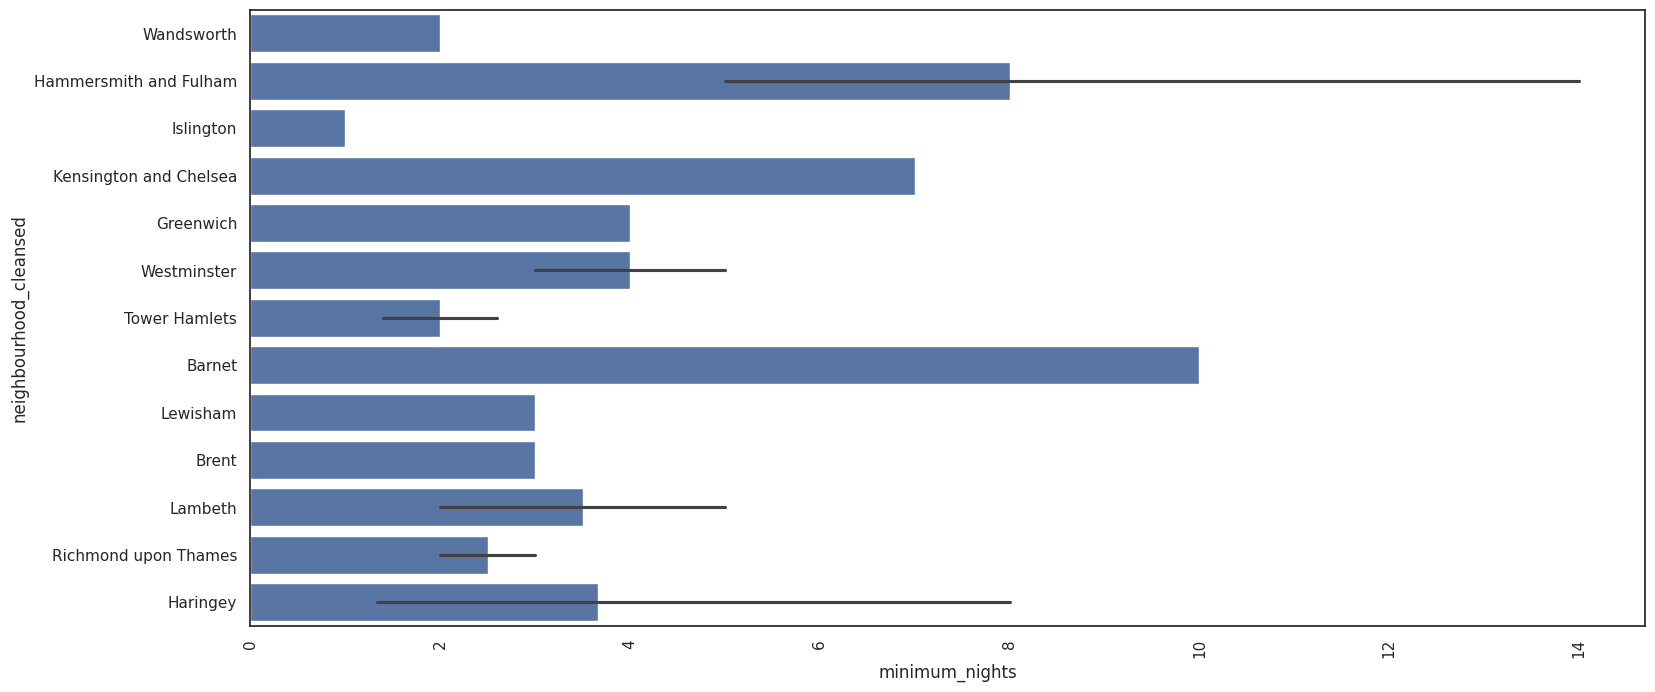

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x=listings.minimum_nights[:25], y=listings.neighbourhood_cleansed[:25])
plt.xticks(rotation=90)
plt.show()

In [ ]:
listings.groupby('room_type')['minimum_nights'].mean()

room_type
Entire home/apt    6.207018
Hotel room         1.844749
Private room       4.672893
Shared room        4.712018
Name: minimum_nights, dtype: float64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


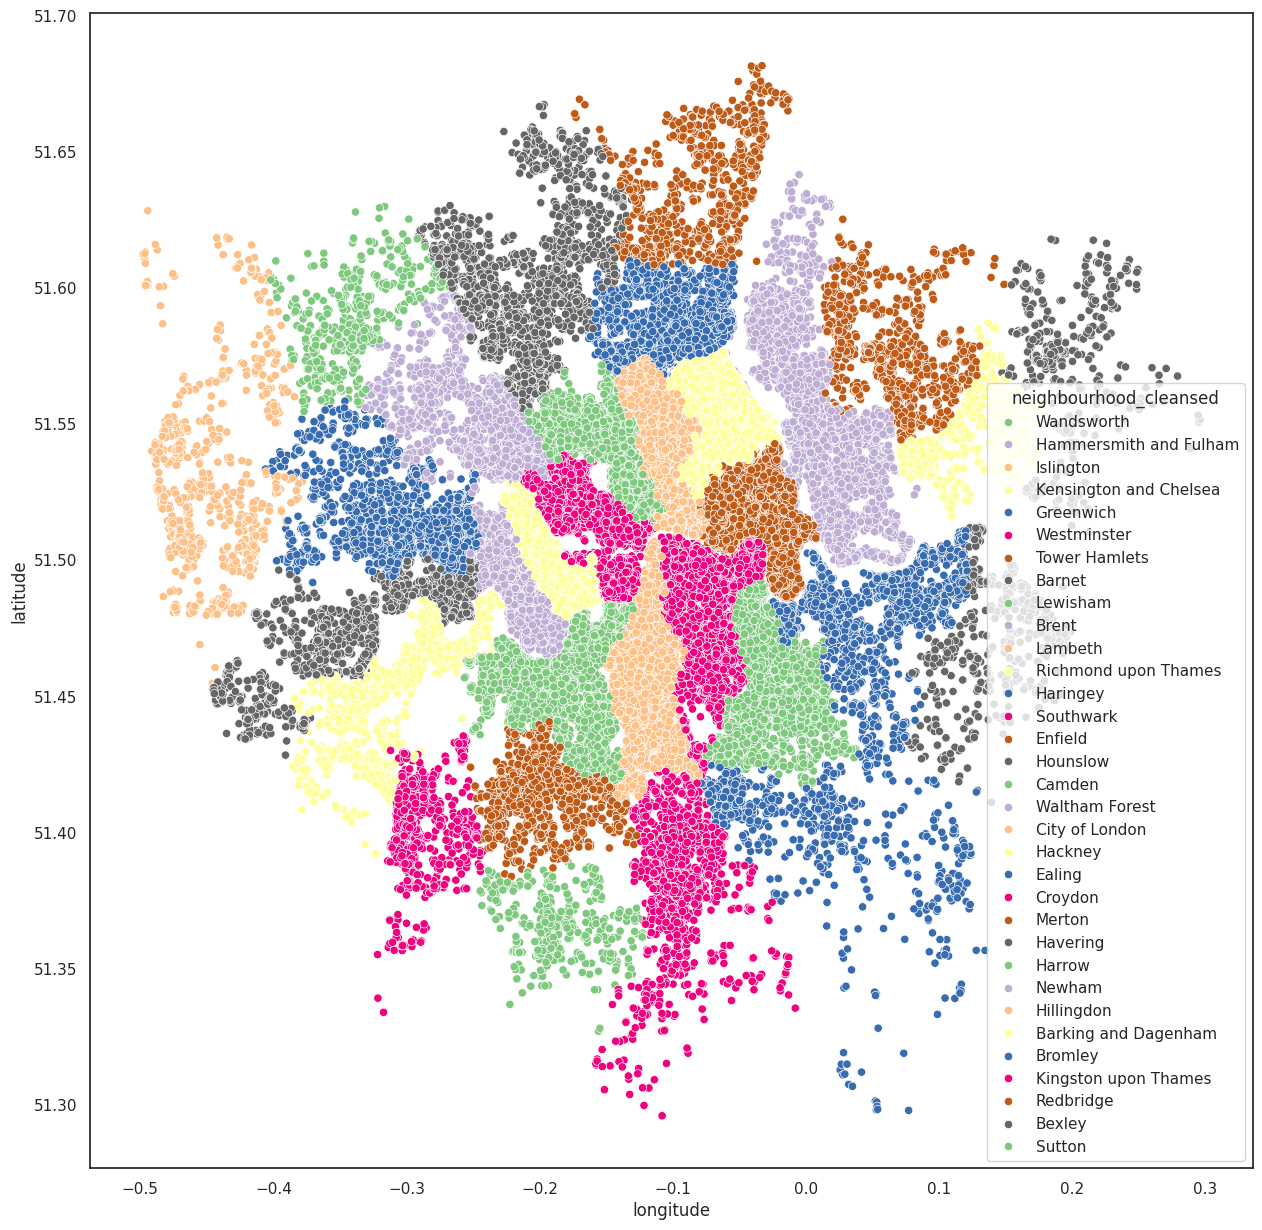

In [ ]:
#visualizing the UK map from the given data
plt.figure(figsize=(15,15))
sns.scatterplot(x=listings.longitude, y=listings.latitude, hue=listings.neighbourhood_cleansed,palette='Accent')
plt.show()

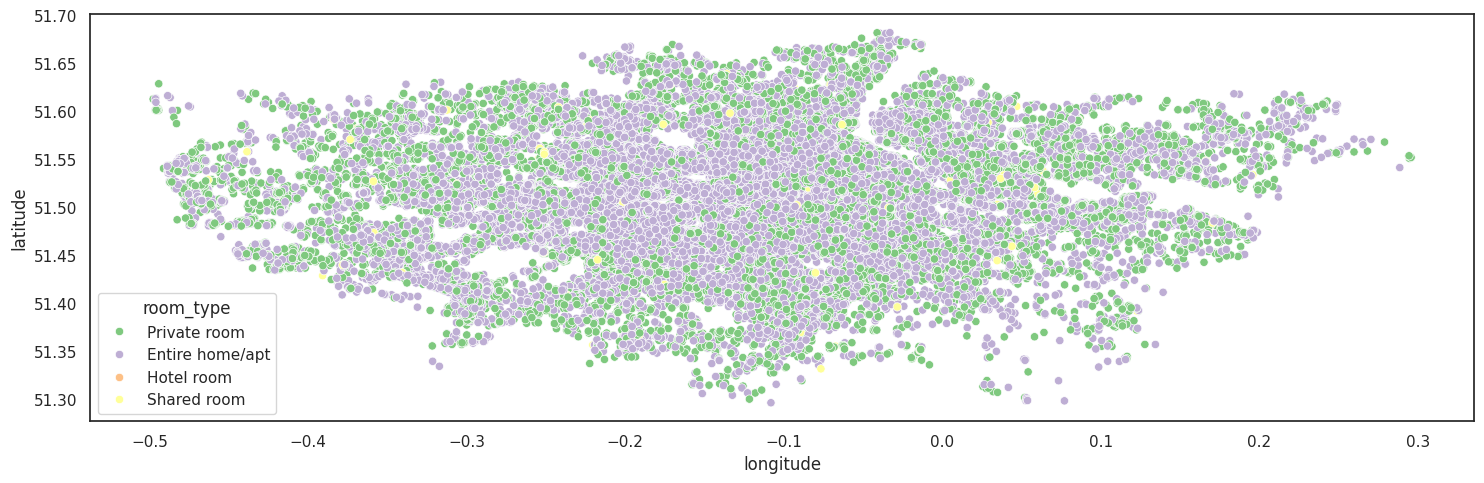

In [ ]:
#visualizing the UK map from the given data
plt.figure(figsize=(15,5))
sns.scatterplot(x=listings.longitude, y=listings.latitude, hue=listings.room_type,palette='Accent')
plt.tight_layout()
plt.show()

###Creating Success Indicator

In [ ]:
#Making a categorical dependent variable based on points based system, where top 50% of features get +1 point,
#and bottom 50% get -1 point, adding scores from all 12 features, if the score is above 5,
#it will be considered a good listing, if score is less than 5, it will be considered a bad listing.
#However, the code below is quiet time inefficient, a for loop or function could have done a better job.
#Further analysis maybe necessary to validate the effectiveness of features selected vs not selected.

# Define thresholds for success classification
reviews_threshold = listings['number_of_reviews'].quantile(0.5)
rating_threshold = listings['review_scores_rating'].quantile(0.5)
response_rate_threshold = listings['host_response_rate'].quantile(0.5)
acceptance_rate_threshold = listings['host_acceptance_rate'].quantile(0.5)
cleanliness_threshold = listings['review_scores_cleanliness'].quantile(0.5)
checkin_threshold = listings['review_scores_checkin'].quantile(0.5)
communication_threshold = listings['review_scores_communication'].quantile(0.5)
location_threshold = listings['review_scores_location'].quantile(0.5)
reviews_per_month_threshold = listings['reviews_per_month'].quantile(0.5)
license_threshold = listings['license'].quantile(0.5)
# Several quantile thresholds are defined for different features such as number of reviews, review scores, response rates, etc.
# These thresholds divide the data into two groups, likely to classify listings as successful or unsuccessful based on the specified features.

# Function to classify success
def classify_success(row):
    score = 0

    if row['number_of_reviews'] > reviews_threshold:
        score += 1
    elif row['number_of_reviews'] < reviews_threshold:
        score -= 1

    if row['review_scores_rating'] > rating_threshold:
        score += 1
    elif row['review_scores_rating'] < rating_threshold:
        score -= 1

    if row['host_response_rate'] > response_rate_threshold:
        score += 1
    elif row['host_response_rate'] < response_rate_threshold:
        score -= 1

    if row['host_acceptance_rate'] > acceptance_rate_threshold:
        score += 1
    elif row['host_acceptance_rate'] < acceptance_rate_threshold:
        score -= 1

    if row['review_scores_cleanliness'] > cleanliness_threshold:
        score += 1
    elif row['review_scores_cleanliness'] < cleanliness_threshold:
        score -= 1

    if row['review_scores_checkin'] > checkin_threshold:
        score += 1
    elif row['review_scores_checkin'] < checkin_threshold:
        score -= 1

    if row['review_scores_communication'] > communication_threshold:
        score += 1
    elif row['review_scores_communication'] < communication_threshold:
        score -= 1

    if row['review_scores_location'] > location_threshold:
        score += 1
    elif row['review_scores_location'] < location_threshold:
        score -= 1

    if row['reviews_per_month'] > reviews_per_month_threshold:
        score += 1
    elif row['reviews_per_month'] < reviews_per_month_threshold:
        score -= 1

    if row['license'] > license_threshold:
        score += 1
    elif row['license'] < license_threshold:
        score -= 1

    if row['host_is_superhost'] >= 1:
        score += 1
    elif row['host_is_superhost'] < 1:
        score -= 1

    if row['instant_bookable'] >= 1:
        score += 1
    elif row['instant_bookable'] < 1:
        score -= 1


    if score > 5:  # Score above 5 indicates 'Good'
        return 1
    elif score < 5:  # Score below 5 indicates 'Bad'
        return 0
    else:
        return 1  # Benefit of doubt for the NA listings to 'Good' if any

# Apply the classification
listings['success'] = listings.apply(classify_success, axis=1)

# Filter out 'Neutral' classifications if desired
listings_filtered = listings[listings['success'].notnull()]

# Display the modified DataFrame
print(listings_filtered.head())


      id                         listing_url       scrape_id last_scraped  \
0  92644  https://www.airbnb.com/rooms/92644  20230906022807   2023-09-06   
1  93015  https://www.airbnb.com/rooms/93015  20230906022807   2023-09-06   
2  13913  https://www.airbnb.com/rooms/13913  20230906022807   2023-09-06   
3  15400  https://www.airbnb.com/rooms/15400  20230906022807   2023-09-06   
4  93734  https://www.airbnb.com/rooms/93734  20230906022807   2023-09-07   

        source                                               name  host_id  \
0  city scrape  Rental unit in Earlsfield · ★4.57 · 1 bedroom ...   498201   
1  city scrape  Rental unit in Hammersmith · ★4.82 · 2 bedroom...   499704   
2  city scrape  Rental unit in Islington · ★4.80 · 1 bedroom ·...    54730   
3  city scrape  Rental unit in London · ★4.80 · 1 bedroom · 1 ...    60302   
4  city scrape  Condo in London · ★4.62 · 1 bedroom · 1 bed · ...   497514   

                                   host_url  host_response_time  \
0

In [ ]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'host_id', 'host_url', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'rev

In [ ]:
listings['success'].describe()


count    87946.000000
mean         0.209879
std          0.407224
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: success, dtype: float64

In [ ]:
listings['success'].value_counts()

success
0    69488
1    18458
Name: count, dtype: int64

###Date Visualization

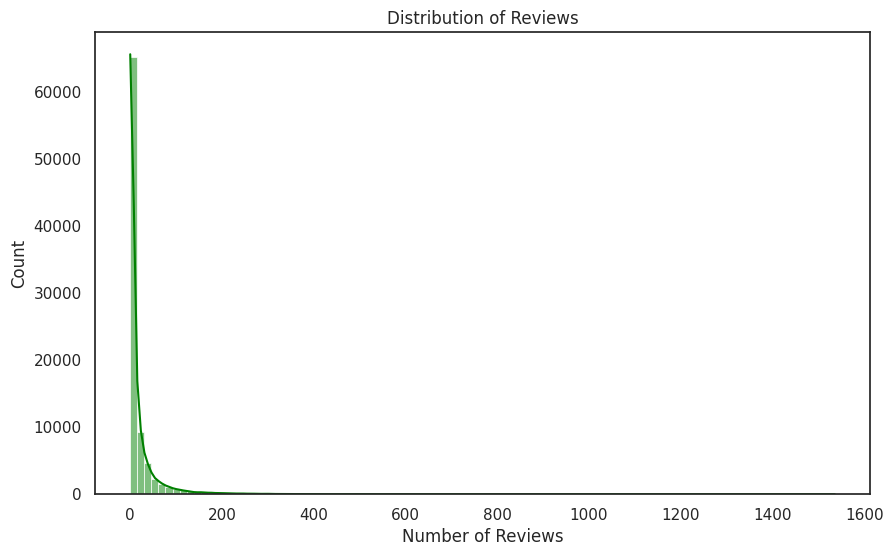

In [ ]:
# Visualize Reviews
plt.figure(figsize=(10, 6))
sns.histplot(listings['number_of_reviews'], bins=100, color='green', kde=True)
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()


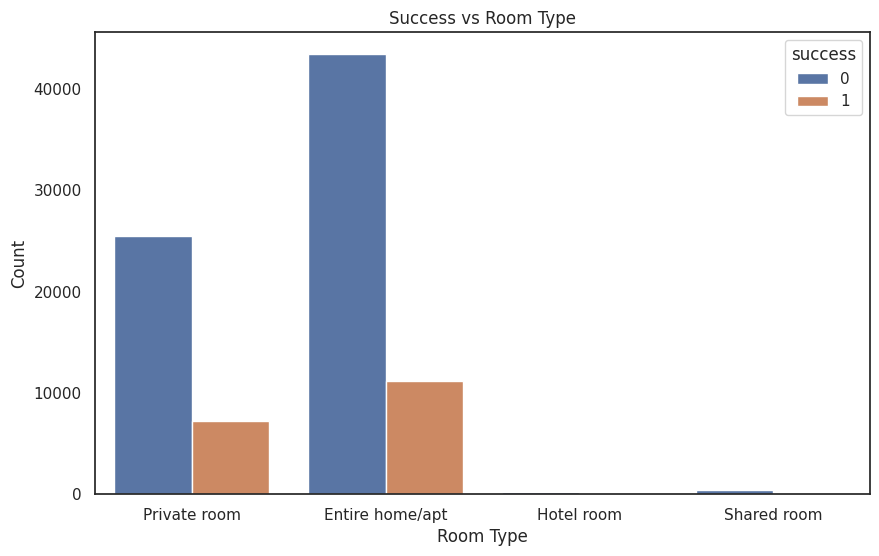

In [ ]:
# Visualize Success vs Room Type
plt.figure(figsize=(10, 6))
sns.countplot(data=listings_filtered, x='room_type', hue='success')
plt.title('Success vs Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

#This indicates that all the good listings are concentrated in either Entire home/apt or the Private room.

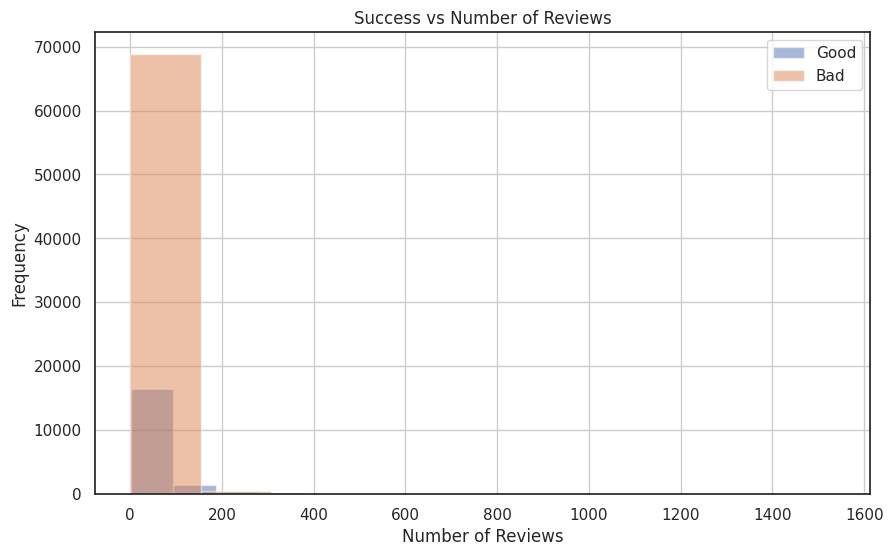

In [ ]:
#Success Vs Number of reviews

plt.figure(figsize=(10, 6))
listings_filtered[listings_filtered['success'] == 1]['number_of_reviews'].hist(alpha=0.5, label='Good')
listings_filtered[listings_filtered['success'] == 0]['number_of_reviews'].hist(alpha=0.5, label='Bad')
plt.title('Success vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.legend()
plt.show()

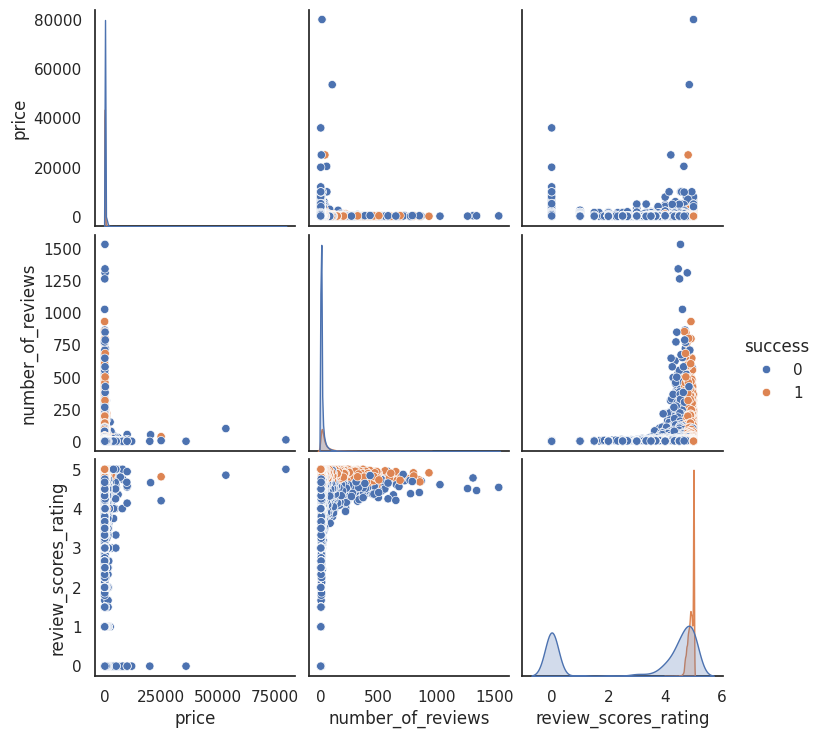

In [ ]:
sns.pairplot(data=listings_filtered, hue='success', vars=['price', 'number_of_reviews', 'review_scores_rating'])
plt.show()


###Splitting data into Test and Train Sets

In [ ]:
category_col = listings.select_dtypes(include = "object").columns
print(list(category_col))

number_col = listings.select_dtypes(exclude = "object").columns
print(list(number_col))

['listing_url', 'last_scraped', 'source', 'name', 'host_url', 'neighbourhood_cleansed', 'property_type', 'room_type', 'amenities', 'has_availability', 'calendar_last_scraped']
['id', 'scrape_id', 'host_id', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'instant_bookabl

In [ ]:
%%time
# Define the features and the target

""" Following features will not be included in the train and test data,
since these features were used to create Success feature which is our dependent variable in the model,
it will create overfitting problem if we train and test our data on same features:
'number_of_reviews', 'review_scores_rating', 'host_response_rate', 'host_acceptance_rate', 'review_scores_cleanliness', 'review_scores_checkin',
'review_scores_communication', 'review_scores_location', 'reviews_per_month', 'license', 'host_is_superhost, and 'instant_bookable''"""

num_cols = ['id', 'scrape_id', 'host_id', 'host_response_time',
            'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic',
            'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'price', 'minimum_nights',
            'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
            'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
            'availability_60', 'availability_90', 'availability_365', 'number_of_reviews_ltm',
            'number_of_reviews_l30d', 'review_scores_accuracy', 'review_scores_value',
            'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
            'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']

# Define the ColumnTransformer to preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols)
])

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Separate features and target variable
X = listings[num_cols]
y = listings['success']

# Preprocess the features
X_preprocessed = pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=10)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (61562, 32)
X_test shape: (26384, 32)
y_train shape: (61562,)
y_test shape: (26384,)
CPU times: user 150 ms, sys: 16.9 ms, total: 167 ms
Wall time: 190 ms


###Train a Decision Tree Model

In [ ]:
%%time

# Initialize the model
decision_tree = DecisionTreeClassifier(random_state=10)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)


CPU times: user 1.42 s, sys: 0 ns, total: 1.42 s
Wall time: 1.45 s


###Evaluate the Model

In [ ]:
%%time
# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

# Cross-validation to ensure generalizability
cv_scores_tree = cross_val_score(decision_tree, X, y, cv=5)
print("Decision Tree Cross-Validation Scores:", cv_scores_tree)
print("Decision Tree Cross-Validation Mean Score:", cv_scores_tree.mean())



Decision Tree Accuracy: 0.8590812613705275
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     20827
           1       0.66      0.67      0.67      5557

    accuracy                           0.86     26384
   macro avg       0.79      0.79      0.79     26384
weighted avg       0.86      0.86      0.86     26384

Decision Tree Confusion Matrix:
[[18942  1885]
 [ 1833  3724]]
Decision Tree Cross-Validation Scores: [0.78089824 0.86895219 0.70214339 0.59065325 0.78406959]
Decision Tree Cross-Validation Mean Score: 0.7453433293736127
CPU times: user 7.03 s, sys: 22.6 ms, total: 7.05 s
Wall time: 7.51 s


**Accuracy**:

The accuracy of the Decision Tree model on the test set is approximately 85.91%. This indicates that the model correctly predicts the class label for approximately 85.91% of the instances in the test set.

**Classification Report**:

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. In this case, for class 0 (unsuccessful listings), the precision is 91%, and for class 1 (successful listings), the precision is 66%.

**Recall**:

Recall is the ratio of correctly predicted positive observations to the all observations in actual class. In this case, for class 0, the recall is 91%, and for class 1, the recall is 67%.

**F1-score**:

The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

**Support**:

The number of actual occurrences of each class in the test set.

The Decision Tree model shows promising performance with an accuracy of 85.91% on the test set. However, the precision, recall, and F1-score for class 1 (Good listings) are lower compared to class 0 (Bad listings), indicating that the model may have difficulty correctly identifying successful listings.

The cross-validation scores also vary across folds, suggesting potential variability in model performance on different subsets of the data. This variability may indicate overfitting or underfitting issues.

Overall, while the model performs reasonably well, further analysis and refinement may be needed to improve its performance, particularly in correctly classifying successful listings.

The model's performance metrics indicate class imbalance, with class 1 having lower precision, recall, and F1-score compared to class 0.

Addressing class imbalance through techniques like oversampling, undersampling, or using different evaluation metrics may be beneficial.

The variability in cross-validation scores across folds suggests that the model may not generalize well to unseen data. Further tuning of hyperparameters or using more sophisticated algorithms could improve generalization.

It's also essential to consider the business context and the cost of misclassifications when interpreting the model's performance.

For example, misclassifying Good listings as Bad (false negatives) may have different implications than misclassifying Bad listings as Good (false positives).

###Feature Importance


Feature Importances:
                                         Feature  Importance
24                         number_of_reviews_ltm    0.277878
26                        review_scores_accuracy    0.226473
27                           review_scores_value    0.069494
2                                        host_id    0.042111
9                                      longitude    0.039568
8                                       latitude    0.038118
11                                         price    0.034034
3                             host_response_time    0.029498
0                                             id    0.026973
23                              availability_365    0.026423
5                      host_total_listings_count    0.016461
21                               availability_60    0.015728
22                               availability_90    0.014490
20                               availability_30    0.014344
4                            host_listings_count    0.011804
10

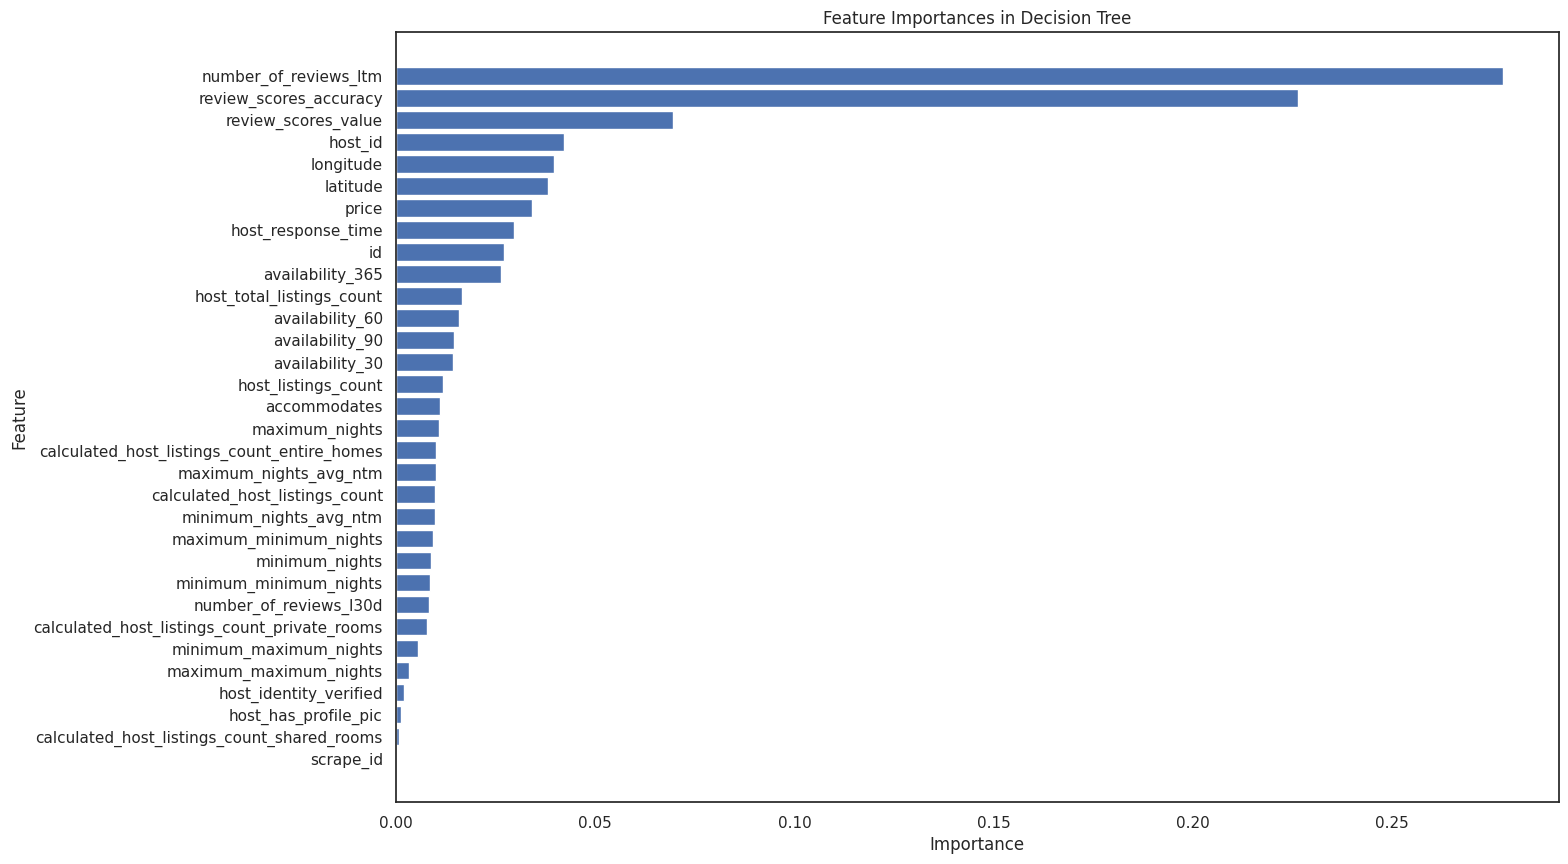

CPU times: user 602 ms, sys: 106 ms, total: 708 ms
Wall time: 602 ms


In [ ]:
%%time

# Get feature importances
feature_importances = decision_tree.feature_importances_
features = num_cols

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(15, 10))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

**Feature Importances**:

The table shows the importance of each feature in the decision-making process of the Decision Tree model. Importance values range from 0 to 1, with higher values indicating greater importance.

For instance, 'number_of_reviews_ltm' has the highest importance value of approximately 0.278, indicating that it is the most influential feature in the model's decision-making process.

However, it's essential to consider the context and domain knowledge when interpreting the results. Some features may have high importances due to their correlation with the target variable, while others may exhibit multicollinearity.

 It's essential to validate the importance of features through sensitivity analysis or by testing the model's performance after removing or modifying specific features.

 Feature importances alone may not provide a complete understanding of the model's behavior. It's crucial to analyze other aspects such as model performance metrics, variable interactions, and prediction errors to gain a comprehensive understanding of the model's strengths and weaknesses.


###Training in Logistic Regression

[[18796  2031]
 [ 1744  3813]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     20827
           1       0.65      0.69      0.67      5557

    accuracy                           0.86     26384
   macro avg       0.78      0.79      0.79     26384
weighted avg       0.86      0.86      0.86     26384

Accuracy: 0.8569208611279563


<timed exec>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



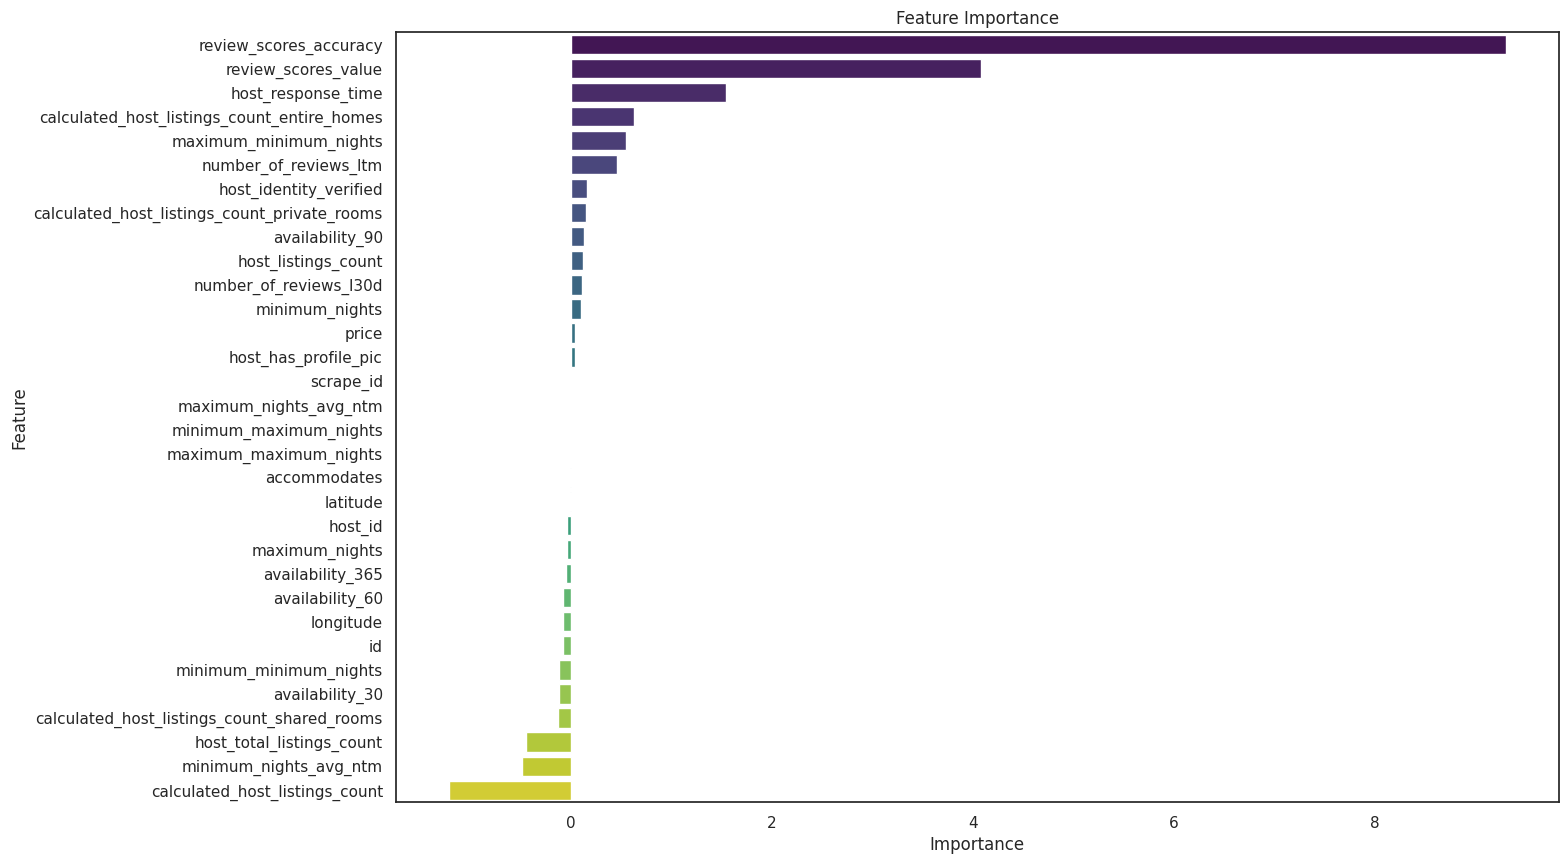

CPU times: user 3.31 s, sys: 1.07 s, total: 4.38 s
Wall time: 2.67 s


In [ ]:
%%time

# Train a logistic regression model
model = LogisticRegression(random_state=123, max_iter=10000)
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

# Plot the feature importance
coefficients = model.coef_[0]
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': coefficients})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance')
plt.show()

**Confusion Matrix**:

True Negatives (TN): 18796 instances were correctly classified as unsuccessful listings.

False Positives (FP): 2031 instances were incorrectly classified as successful listings.

False Negatives (FN): 1744 instances were incorrectly classified as unsuccessful listings.

True Positives (TP): 3813 instances were correctly classified as successful listings.

**Classification Report**:

Precision, Recall, and F1-score for both classes (0 and 1) are provided.

Precision for class 0 (Bad listings) is higher than for class 1 (Good listings), indicating that the model is better at identifying bad listings.

Accuracy of the Logistic Regression model on the test set is approximately 85.69%.

**Feature Importance**:

Feature importance is determined by the coefficients of the logistic regression model.

Features with higher absolute coefficients are considered more important in predicting the target variable.

The feature importance plot shows the importance of each feature in predicting the target variable.

**Comparison with Decision Tree Model**:

Both models achieve similar accuracy scores on the test set (approximately 85.69% for Logistic Regression vs. 85.91% for Decision Tree).

The confusion matrices and classification reports show similar performance metrics for both models, with slight differences in precision, recall, and F1-score for each class.

The feature importance plots highlight different sets of features as important for prediction. Logistic Regression assigns importance based on coefficients, while Decision Tree uses feature importances based on node impurities.

Logistic Regression tends to perform better when there's a linear relationship between features and the target variable, while Decision Tree can capture complex non-linear relationships.

Both models show reasonable performance, but there's room for improvement in correctly identifying Good listings (class 1), as indicated by lower precision, recall, and F1-score for class 1 compared to Bad listings.

It's essential to further analyze the models' performance, possibly by tuning hyperparameters, exploring different algorithms, or considering additional features, to improve predictive accuracy and generalization to unseen data.

Interpretation of feature importance in logistic regression should consider the assumption of linearity between features and the log-odds of the target variable. If this assumption is violated, the importance of features may not accurately reflect their true predictive power.